# **Importing Modules**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# **Importing Datasets**

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/train.csv')
#stores = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/stores.csv')
#features = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/features.csv')

data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

<ipython-input-2-4a66f74667dc>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


**Training Dataset**

In [ ]:
data.shape

(207323, 5)

In [ ]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
207318,22,2,2010-12-10,55761.86,False
207319,22,2,2010-12-17,57701.06,False
207320,22,2,2010-12-24,73718.27,False
207321,22,2,2010-12-31,36754.71,True
207322,22,2,2011-01-07,45804.00,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207323 entries, 0 to 207322
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         207323 non-null  int64  
 1   Dept          207323 non-null  int64  
 2   Date          207323 non-null  object 
 3   Weekly_Sales  207323 non-null  float64
 4   IsHoliday     207322 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ MB


**Dataset containing info of Stores**

In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [ ]:
features.shape

(8190, 12)

In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [ ]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [ ]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [ ]:
data = pd.merge(data,stores,on='Store',how='left')

In [ ]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.sort_values(by=['Date'],inplace=True)

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [ ]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207323 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         207323 non-null  int64         
 1   Dept          207323 non-null  int64         
 2   Date          207323 non-null  datetime64[ns]
 3   Weekly_Sales  207323 non-null  float64       
 4   Type          207323 non-null  object        
 5   Size          207323 non-null  int64         
 6   Temperature   207323 non-null  float64       
 7   Fuel_Price    207323 non-null  float64       
 8   MarkDown1     207323 non-null  float64       
 9   MarkDown2     207323 non-null  float64       
 10  MarkDown3     207323 non-null  float64       
 11  MarkDown4     207323 non-null  float64       
 12  MarkDown5     207323 non-null  float64       
 13  CPI           207323 non-null  float64       
 14  Unemployment  207323 non-null  float64       
 15  I

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,2,4,2010-02-05,47681.96,A,202307,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,1,19,2010-02-05,1947.05,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,5,16,2010-02-05,4545.64,B,34875,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False
2010-02-05,10,85,2010-02-05,3150.38,B,126512,54.34,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,9.765,False


# **Splitting Date Column**

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-23-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,2,4,2010-02-05,47681.96,A,202307,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2010,2,5
2010-02-05,1,19,2010-02-05,1947.05,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,5,16,2010-02-05,4545.64,B,34875,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False,2010,2,5
2010-02-05,10,85,2010-02-05,3150.38,B,126512,54.34,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,9.765,False,2010,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [ ]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       19
dtype: int64

In [ ]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,7,74,2010-02-05,7329.72,B,70713,10.53,2.580,0.0,0.0,...,9.014,False,2010,2,5,14516.40,6457.04,9714.135315,9625.52,1684.790296
2010-02-05,18,6,2010-02-05,5883.54,B,120653,21.33,2.788,0.0,0.0,...,9.202,False,2010,2,5,35059.65,1485.96,5664.913077,4769.00,4135.815291
2010-02-05,2,98,2010-02-05,14693.62,A,202307,40.19,2.572,0.0,0.0,...,8.324,False,2010,2,5,24029.00,10994.87,14035.400839,13418.13,2394.749377
2010-02-05,20,91,2010-02-05,109009.28,A,203742,25.92,2.784,0.0,0.0,...,8.187,False,2010,2,5,109009.28,54836.69,78493.190140,78895.00,9800.109904


In [ ]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
data.shape

(207304, 20)

In [ ]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(185956, 20)

**Negative Weekly Sales**

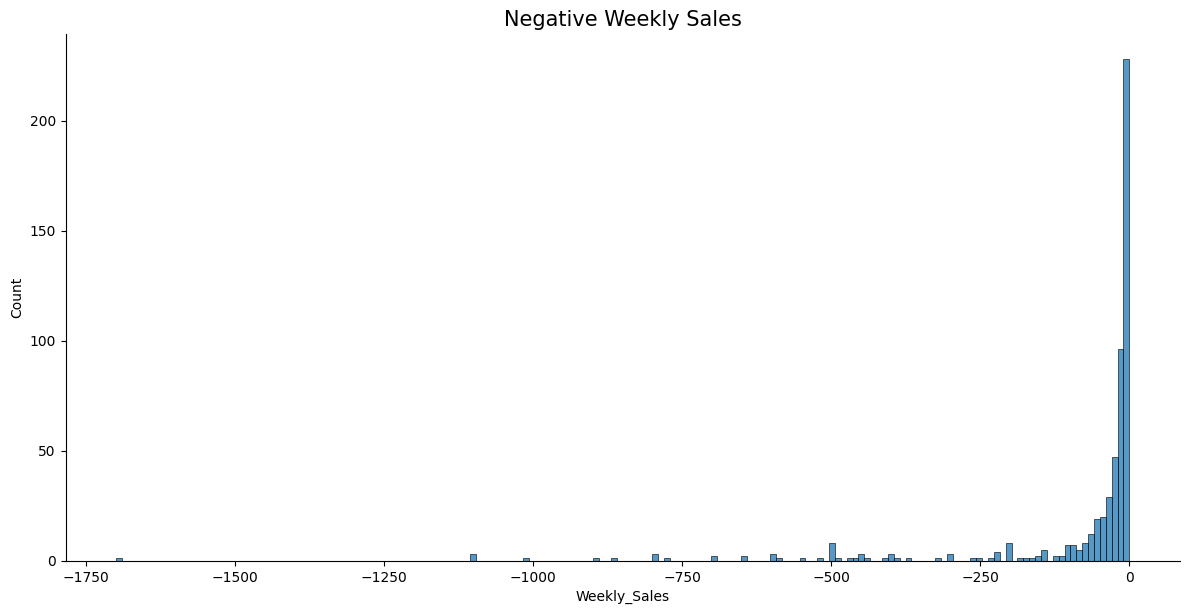

In [ ]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.savefig('negative_weekly_sales.png')
plt.show()

In [ ]:
data=data[data['Weekly_Sales']>=0]

In [ ]:
data.shape

(185403, 20)

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

<ipython-input-35-8fdcbc3ff8c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


In [ ]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,18,6,2010-02-05,5883.54,B,120653,21.33,2.788,131.527903,9.202,0,2010,2,5,35059.65,1485.96,5664.913077,4769.00,4135.815291,0.00
2010-02-05,2,98,2010-02-05,14693.62,A,202307,40.19,2.572,210.752605,8.324,0,2010,2,5,24029.00,10994.87,14035.400839,13418.13,2394.749377,0.00
2010-02-05,13,17,2010-02-05,22419.66,A,219622,31.53,2.666,126.442065,8.316,0,2010,2,5,41334.01,13642.78,17713.297902,16828.31,3739.372091,0.00
2010-02-05,11,10,2010-02-05,24723.87,A,207499,46.04,2.572,214.424881,7.368,0,2010,2,5,30300.93,15316.56,23449.992727,23481.07,2836.616873,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,9,91,2012-10-26,914.84,B,125833,69.52,3.506,227.232807,4.954,0,2012,10,43,1738.65,264.20,869.273287,866.34,287.364370,2189.61
2012-10-26,17,30,2012-10-26,2681.19,B,93188,39.94,3.755,131.193097,5.527,0,2012,10,43,4489.77,802.08,2276.462098,2305.48,529.926077,6588.25
2012-10-26,17,31,2012-10-26,3823.40,B,93188,39.94,3.755,131.193097,5.527,0,2012,10,43,6092.18,858.47,1923.034266,1606.74,905.381965,6588.25


In [ ]:
data.to_csv('preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

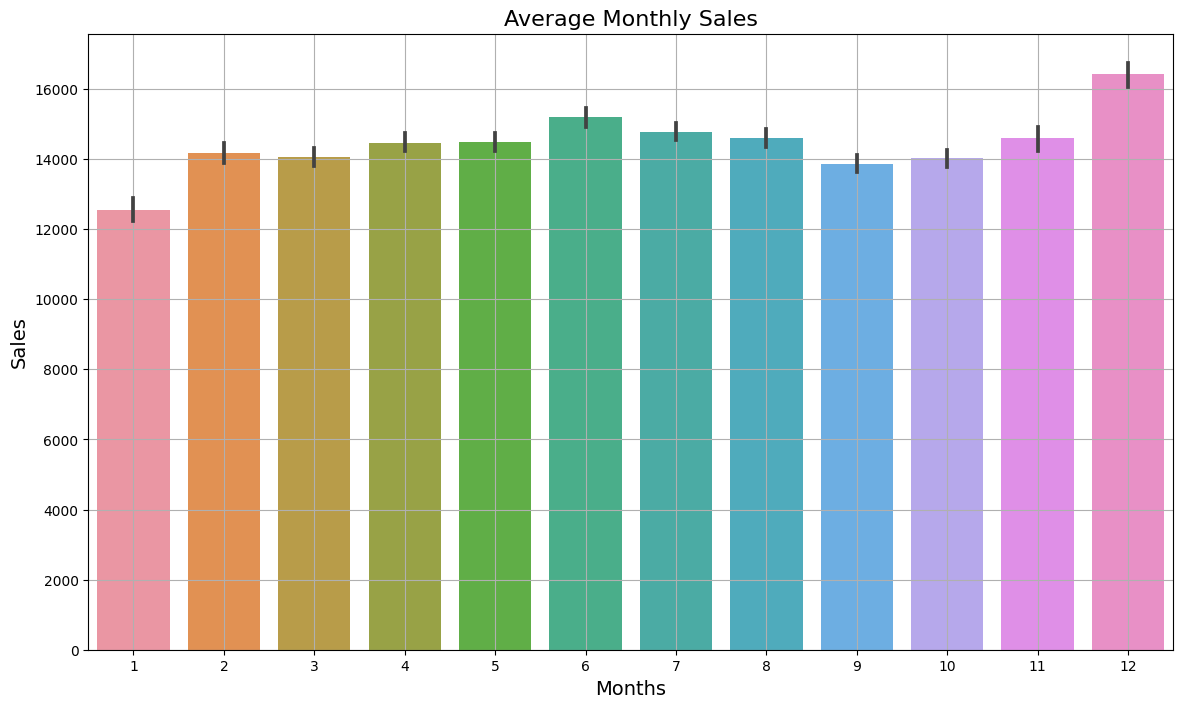

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

**Monthly Sales for Each Year**

In [ ]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,75423130.50,74439334.09,96935894.10,76804522.71,8.076849e+07,98206758.06,79239985.49,74916412.71,93196186.87,79673829.60,1.073810e+08
2011,63267688.53,72385397.41,74335413.01,95809450.20,75786769.33,8.052765e+07,97224030.31,77101668.30,91689880.37,76073223.92,57866501.93,8.594978e+07
2012,58819949.97,50666897.85,89551949.27,81993100.69,82572830.80,1.045182e+08,80478653.64,90133634.04,77635230.19,77258136.39,NaN,NaN


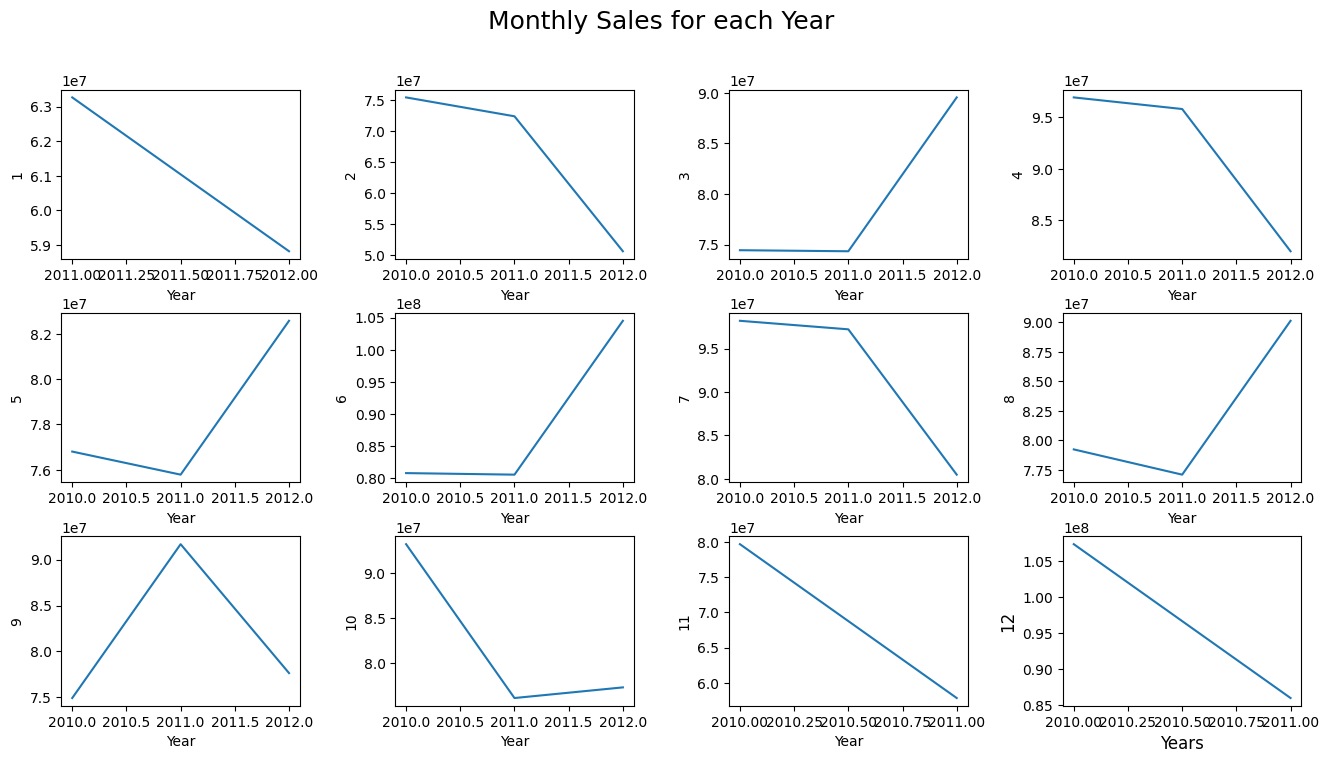

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('monthly_sales_every_year.png')
plt.show()

**Average Weekly Sales Store wise**

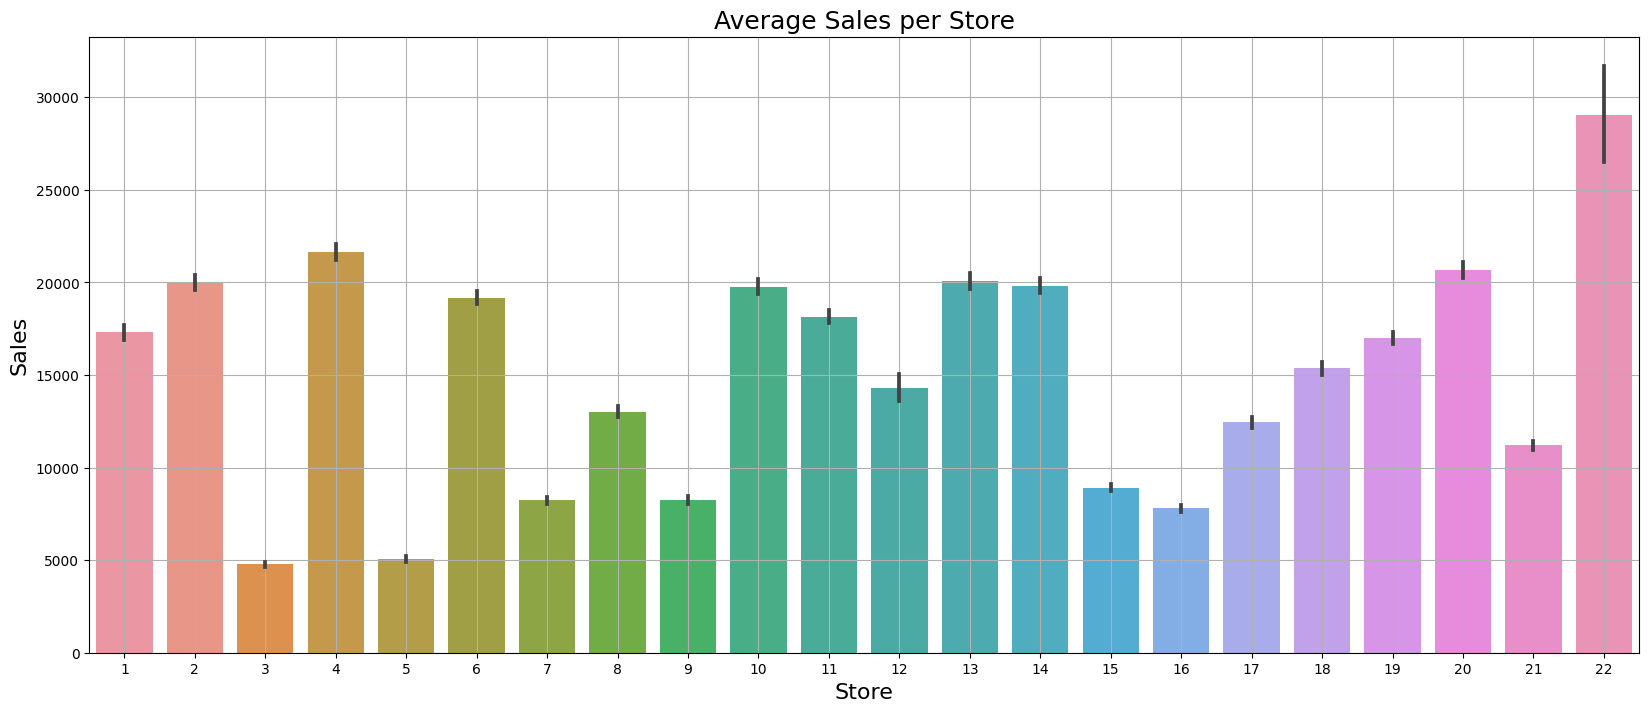

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

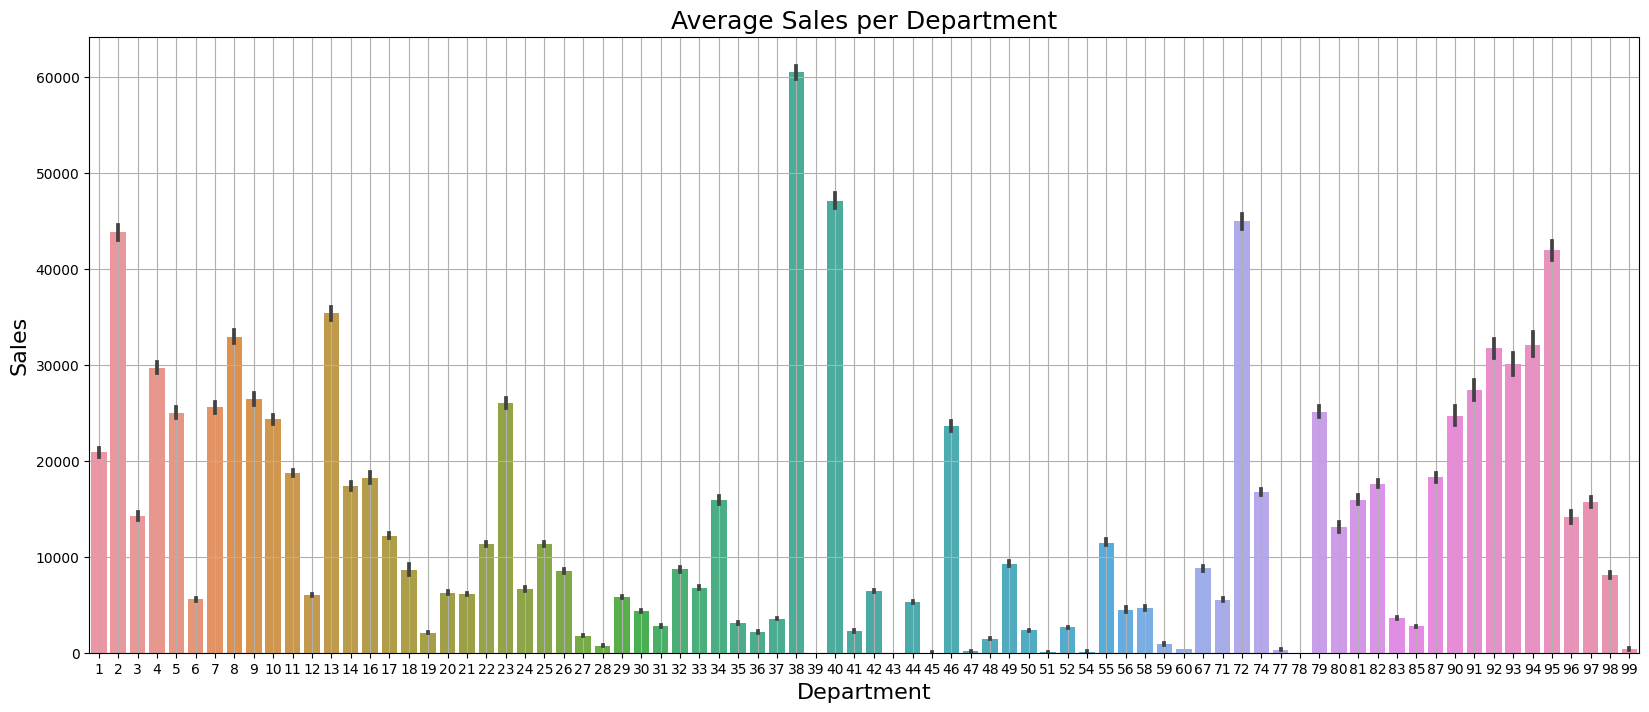

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('avg_sales_dept.png')
plt.show()

**Sales Vs Temperature**

<ipython-input-43-921fc3a36c2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


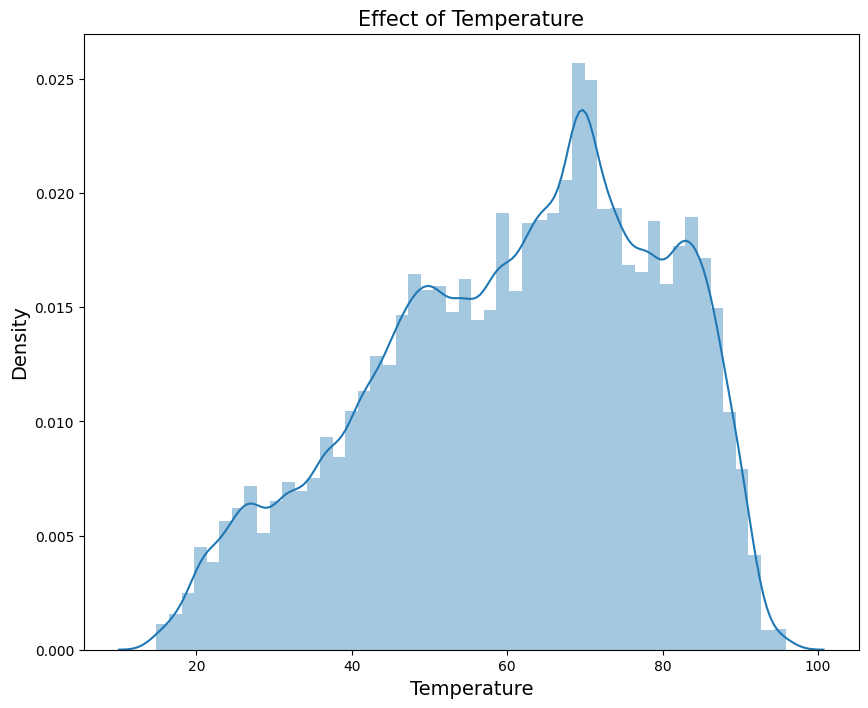

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('effect_of_temp.png')
plt.show()

**Holiday Distribution**

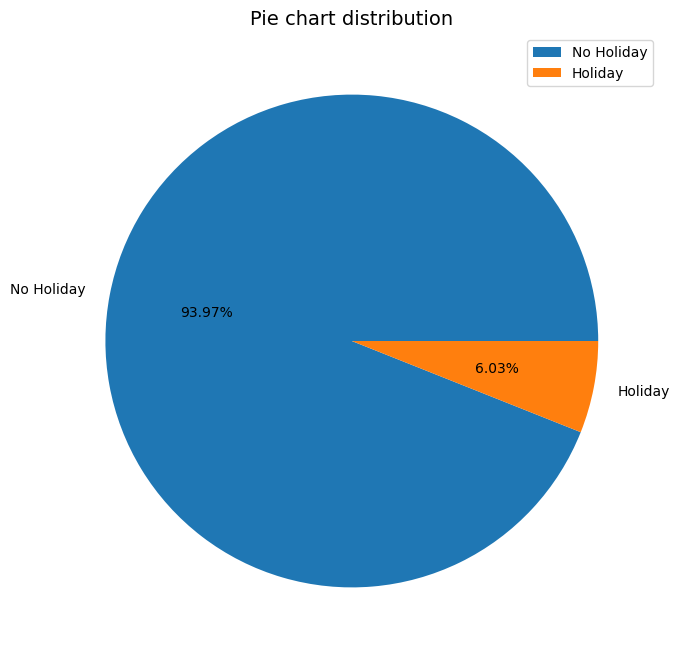

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('holiday_distribution.png')
plt.show()

#**Time Series Decompose**

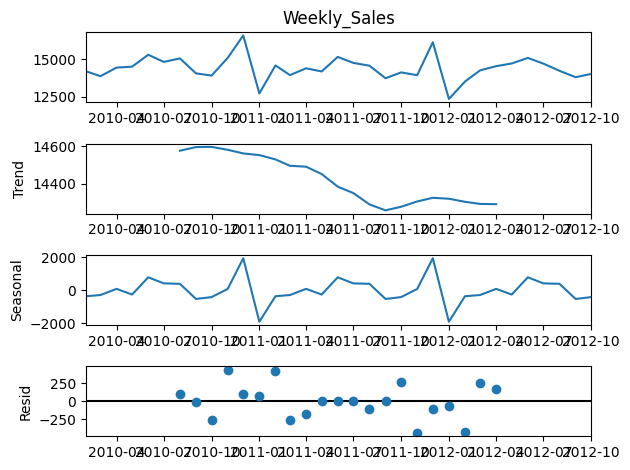

In [ ]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('seasonal_decompose.png')
plt.show()

# **One-hot-encoding**

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,9,91,B
2012-10-26,17,30,B
2012-10-26,17,31,B
2012-10-26,5,25,B
2012-10-26,5,3,B


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.shape

(185403, 20)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(185403, 124)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.drop(columns=['Date'],inplace=True)

In [ ]:
data.shape

(185403, 120)

# **Data Normalization**

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,5883.54,120653,21.33,2.788,131.527903,9.202,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,14693.62,202307,40.19,2.572,210.752605,8.324,0,2010,2,5,...,0,0,0,0,0,0,1,0,1,0
2010-02-05,22419.66,219622,31.53,2.666,126.442065,8.316,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,24723.87,207499,46.04,2.572,214.424881,7.368,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.309753,0.630267,0.338843,0.029974,0.840500,0.545560,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.073119,0.464300,0.080054,0.141602,0.054008,0.687016,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,0.182607,0.906277,0.312693,0.029974,0.837102,0.573696,0,2010,2,5,...,0,0,0,0,0,0,1,0,1,0
2010-02-05,0.278624,1.000000,0.205871,0.078553,0.003737,0.572664,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.307260,0.934381,0.384853,0.029974,0.873400,0.450310,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# **Correlation between features of dataset**

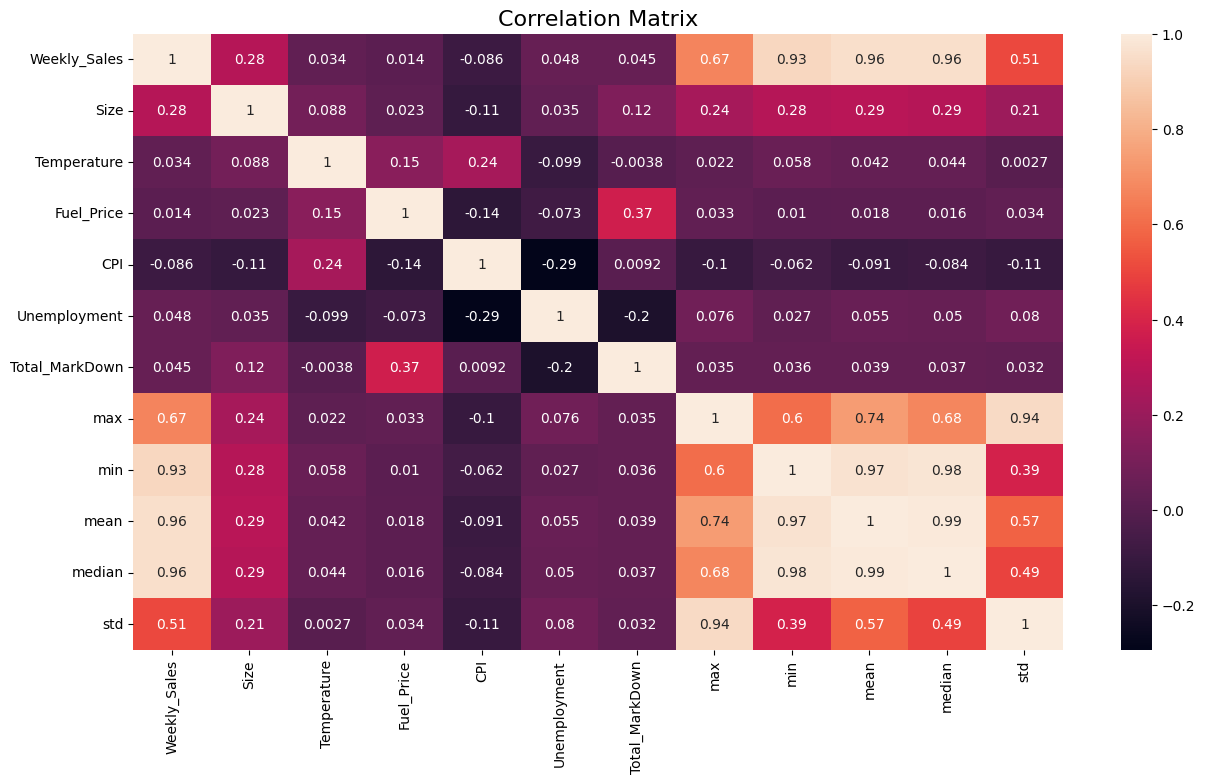

In [ ]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

# **Recursive Feature Elimination**

In [ ]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_A', 'Type_B', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=119)

In [ ]:
'''
param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_train[feature_col],data_train['Weekly_Sales'])
'''

"\nparam_grid={'n_estimators':np.arange(10,25)}\ntree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)\ntree.fit(data_train[feature_col],data_train['Weekly_Sales'])\n"

In [ ]:
#tree.best_params_

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [ ]:
pkl_filename = "feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,7.940761e-01
1,2,median,1.320511e-01
2,3,Week,2.012940e-02
3,4,Temperature,9.008283e-03
4,5,max,6.634819e-03
...,...,...,...
114,115,Dept_45,2.453997e-10
115,116,Dept_51,1.524428e-10
116,117,Dept_78,8.200837e-12
117,118,Dept_39,2.696009e-14


In [ ]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'min', 'Fuel_Price', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_3', 'Size', 'IsHoliday', 'Dept_18', 'Dept_9', 'Dept_1', 'Year', 'Dept_5', 'Dept_56', 'Dept_11']


In [ ]:
X = data[x]
Y = data['Weekly_Sales']

In [ ]:
data = pd.concat([X,Y],axis=1)

In [ ]:
data

,mean,median,Week,Temperature,max,CPI,min,Fuel_Price,Unemployment,std,...,Size,IsHoliday,Dept_18,Dept_9,Dept_1,Year,Dept_5,Dept_56,Dept_11,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.172517,5,0.338843,0.121412,0.840500,0.200971,0.029974,0.545560,0.189249,...,0.630267,0,0,0,1,2010,0,0,0,0.309753
2010-02-05,0.053179,0.044745,5,0.080054,0.073908,0.054008,0.039423,0.141602,0.687016,0.079427,...,0.464300,0,0,0,0,2010,0,0,0,0.073119
2010-02-05,0.130174,0.125021,5,0.312693,0.050653,0.837102,0.157122,0.029974,0.573696,0.045990,...,0.906277,0,0,0,0,2010,0,0,0,0.182607
2010-02-05,0.164005,0.156672,5,0.205871,0.087136,0.003737,0.189897,0.078553,0.572664,0.071813,...,1.000000,0,0,0,0,2010,0,0,0,0.278624
2010-02-05,0.216773,0.218419,5,0.384853,0.063876,0.873400,0.210615,0.029974,0.450310,0.054476,...,0.934381,0,0,0,0,2010,0,0,0,0.307260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.009067,0.008523,43,0.674479,0.003659,1.000000,0.024300,0.512661,0.138745,0.005519,...,0.492338,0,0,0,0,2012,0,0,0,0.011369
2012-10-26,0.022011,0.021881,43,0.309609,0.009459,0.050698,0.030958,0.641344,0.212700,0.010177,...,0.315637,0,0,0,0,2012,0,0,0,0.033321
2012-10-26,0.018760,0.015395,43,0.309609,0.012838,0.050698,0.031656,0.641344,0.212700,0.017388,...,0.315637,0,0,0,0,2012,0,0,0,0.047516


In [ ]:
data.to_csv('final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.18118846743239


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030572412117400263
MSE 0.003504113587712975
RMSE 0.05919555378331193
R2 0.9218118956877757


In [ ]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-03-04,0.350826,0.331459
2010-07-23,0.405943,0.505678
2012-01-13,0.783270,0.641778
2010-10-15,0.205250,0.294811
2011-02-04,0.156097,0.193120
...,...,...
2012-06-08,0.218113,0.224947
2012-10-19,0.213375,0.219588
2011-05-06,0.432302,0.399569


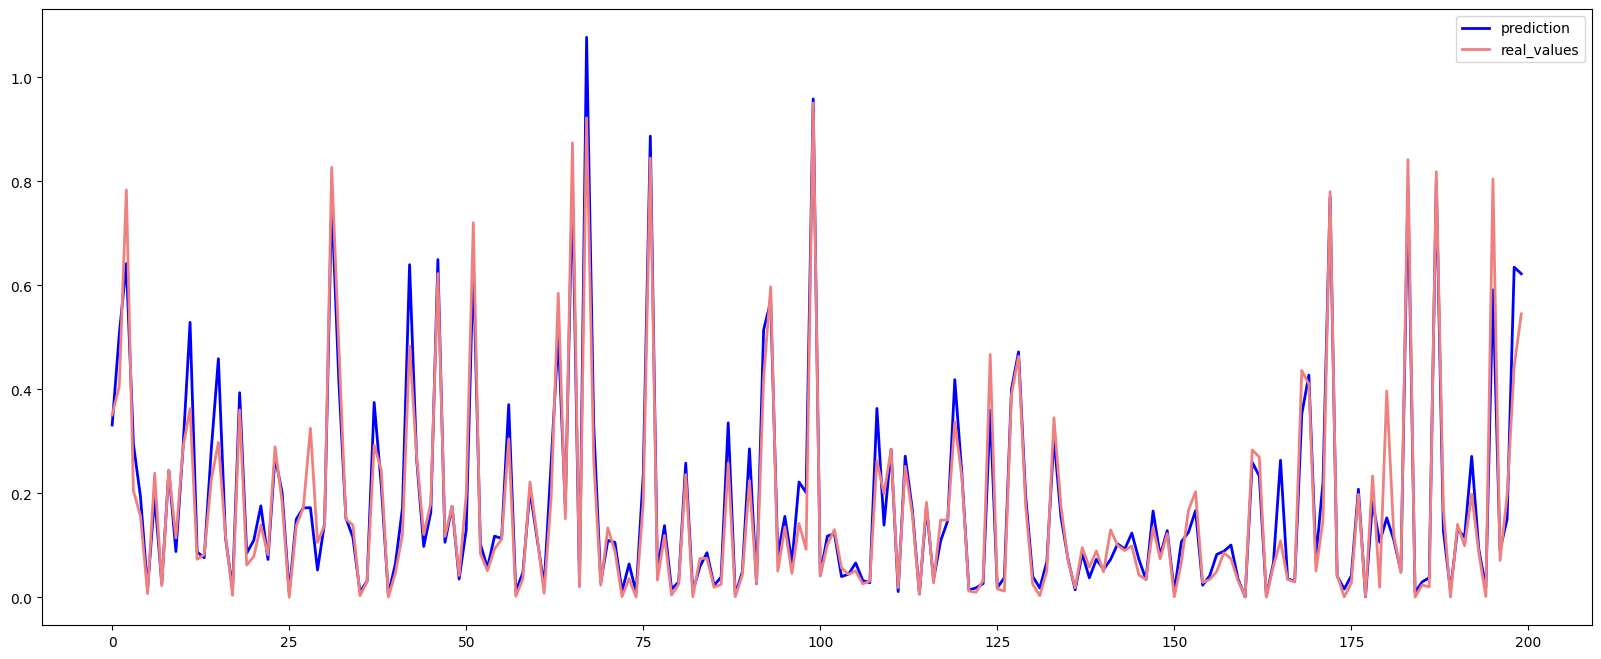

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('lr_real_pred.png')
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Random Forest Regressor Model**

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.7502028820908


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015977710292005984
MSE 0.0010082791505621905
RMSE 0.03175341163658152
R2 0.9775045512935517


In [ ]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-03-04,0.350826,0.318596
2010-07-23,0.405943,0.451877
2012-01-13,0.783270,0.669691
2010-10-15,0.205250,0.227939
2011-02-04,0.156097,0.170408
...,...,...
2012-06-08,0.218113,0.247858
2012-10-19,0.213375,0.221725
2011-05-06,0.432302,0.411434


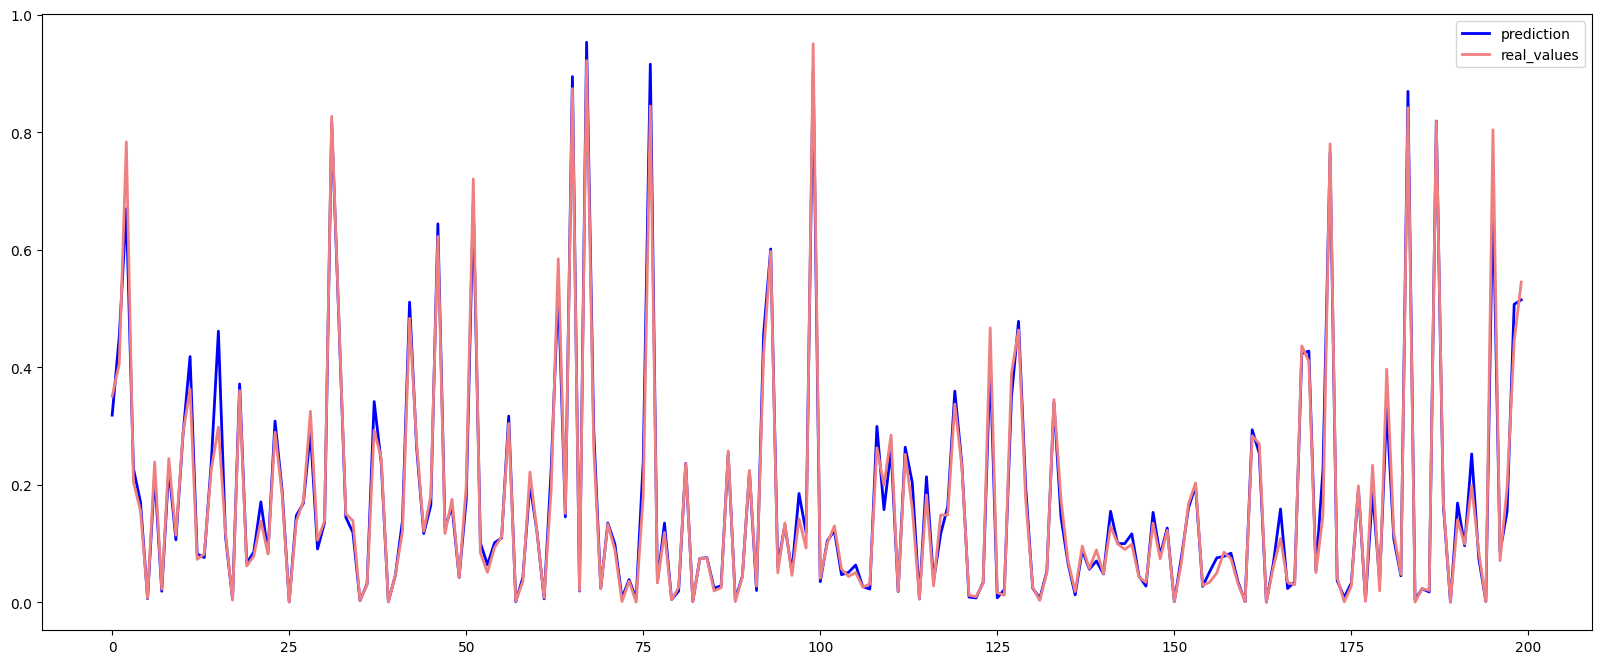

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('rf_real_pred.png')
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **K Neighbors Regressor Model**

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.22207746052626


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0350772132396831
MSE 0.003933953071300219
RMSE 0.06272123301801567
R2 0.9125351910245156


In [ ]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-03-04,0.350826,0.328058
2010-07-23,0.405943,0.376805
2012-01-13,0.783270,0.622442
2010-10-15,0.205250,0.162587
2011-02-04,0.156097,0.160135
...,...,...
2012-06-08,0.218113,0.274340
2012-10-19,0.213375,0.178531
2011-05-06,0.432302,0.419157


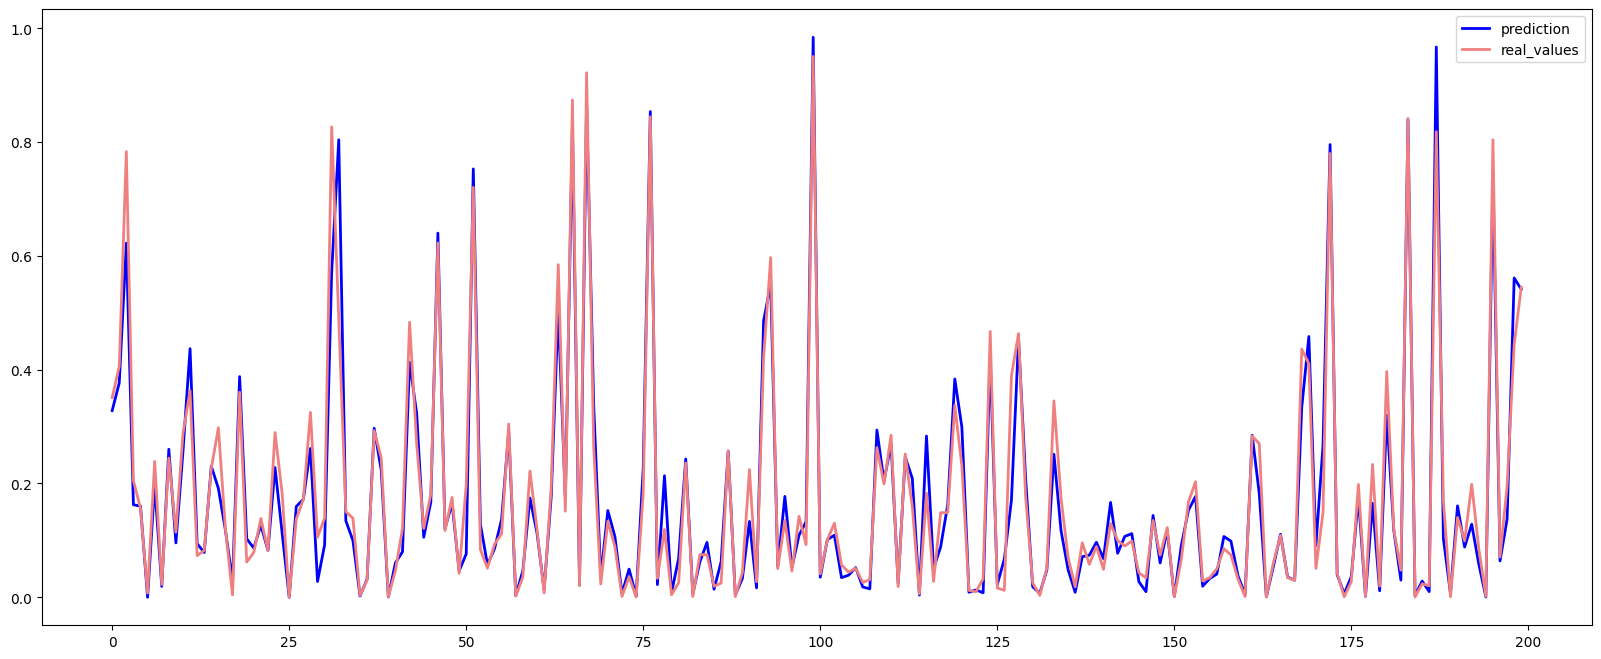

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('knn_real_pred.png')
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **XGboost Model**

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.5196785985476


In [ ]:
y_pred = xgbr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01938172411974706
MSE 0.0011115919457225366
RMSE 0.033340545072367014
R2 0.9751973902781153


In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-03-04,0.350826,0.322477
2010-07-23,0.405943,0.424583
2012-01-13,0.783270,0.637208
2010-10-15,0.205250,0.189843
2011-02-04,0.156097,0.185888
...,...,...
2012-06-08,0.218113,0.237509
2012-10-19,0.213375,0.185281
2011-05-06,0.432302,0.414955


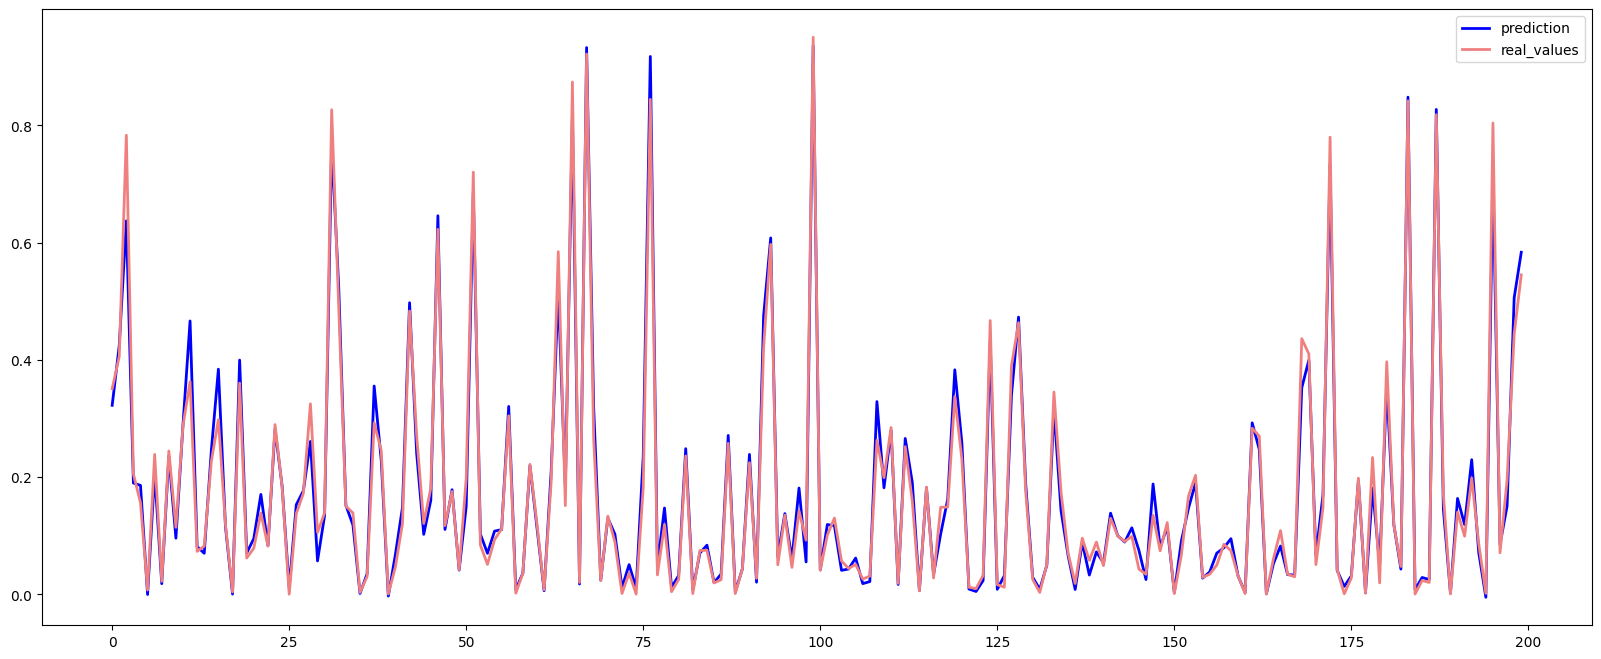

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('xgb_real_pred.png')
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Comparing Models**

In [ ]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}

In [ ]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.181188
1,rf_acc,97.750203
2,knn_acc,91.222077
3,xgb_acc,97.519679


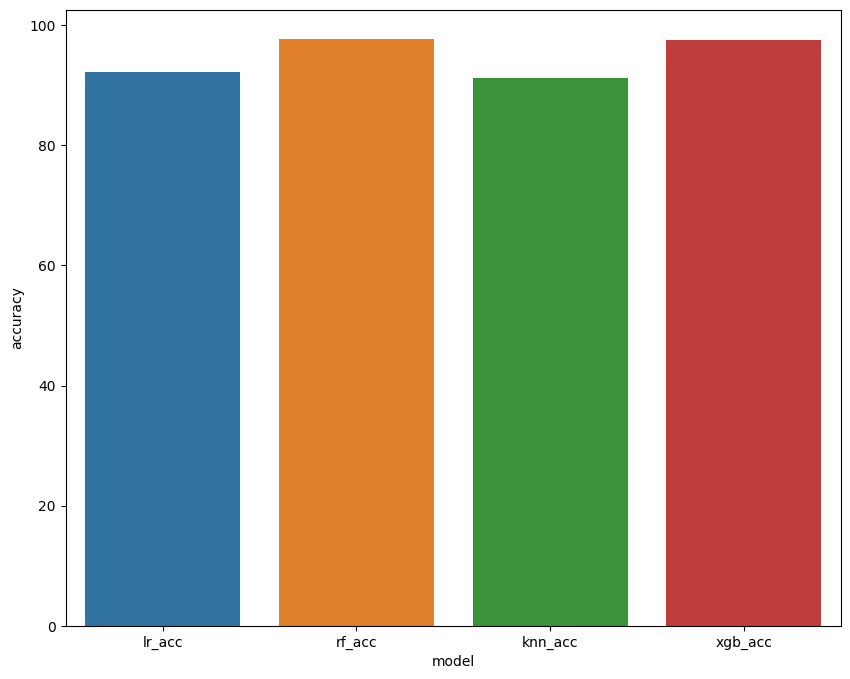

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('compared_models.png')
plt.show()